<a href="https://colab.research.google.com/github/krisdsutton/Practice-Repo/blob/main/Data_205_EDA_MC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 205 Project Montgomery County Crash Data

### Kris Sutton

###November 3, 2021


Source: dataMontgomery

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf



Dataset information:
provides general information about all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.

Number of observations: 74,568

Number of variables: 44

Each row is a "Collision"

Reasearch Questions:

In what areas of the county are there more accidents and more severe accidents?

In what cities in Maryland are there more accidents and more severe accidents?
mapping


In [136]:
#import  pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn
import seaborn as sns
#import ticker
import matplotlib.ticker as mtick
plt.style.use('classic')

from pandas_profiling import ProfileReport
from IPython.display import Image

In [137]:
# read MC crash dataset
mc_crash = pd.read_csv('/content/sample_data/MC_Crash_Data.csv')
mc_crash_clean = pd.read_csv('/content/sample_data/MC_Crash_Data.csv')
mc_crash.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,"IN FRONT OF 6630 EAMES WAY BETHESDA, MD.",NaN,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER,NaN,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,EJ78460055,200017938,Gaithersburg Police Depar,Property Damage Crash,05/02/2020 02:16:00 PM,Yes,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,949 CLOPPER RD PARKING LOT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,PARKED VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,09/15/2020 03:33:00 PM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT @ 9827 BROOKRIDGE CT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,OTHER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.188862,-77.202455,"(39.18886167, -77.202455)"
3,HA23890011,20002466,Maryland-National Capital,Property Damage Crash,10/14/2020 08:40:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,GRAVEL PARKING LOT AT POPE FARM NURSERY,NaN,NaN,UNKNOWN,NaN,NaN,NaN,DAYLIGHT,NaN,NaN,NaN,UNITS SEPARATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,03/03/2020 09:19:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT OF 16705 CRABBS BRANCH WAY,NaN,NaN,DRIVER,SINGLE VEHICLE,CLOUDY,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER OBJECT,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39.129216,-77.167342,"(39.1292155, -77.16734233)"


In [138]:
#getting information about number of cloumn and rows, variable types
mc_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74568 entries, 0 to 74567
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Report Number                 74568 non-null  object 
 1   Local Case Number             74568 non-null  object 
 2   Agency Name                   74568 non-null  object 
 3   ACRS Report Type              74568 non-null  object 
 4   Crash Date/Time               74568 non-null  object 
 5   Hit/Run                       74566 non-null  object 
 6   Route Type                    64630 non-null  object 
 7   Mile Point                    65061 non-null  float64
 8   Mile Point Direction          64646 non-null  object 
 9   Lane Direction                65072 non-null  object 
 10  Lane Number                   74568 non-null  int64  
 11  Lane Type                     7209 non-null   object 
 12  Number of Lanes               74568 non-null  int64  
 13  D

##Data Wrangling

In [139]:
#checking for N/A
mc_crash.isnull()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74563,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False
74564,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
74565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
74566,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
#Counting "n/a"s in dataset
mc_crash.isna().sum().sort_values(ascending = False)

Non-Motorist Substance Abuse    71348
Related Non-Motorist            70511
Lane Type                       67359
Municipality                    66633
Off-Road Description            65072
Fixed Oject Struck              58862
Second Harmful Event            55824
Intersection Area               53894
Intersection Type               37898
Junction                        19849
Traffic Control                 13211
Road Condition                  12237
Driver Substance Abuse          11945
Surface Condition               11347
Road Division                   10458
Road Grade                      10002
Cross-Street Type                9949
Route Type                       9938
Mile Point Direction             9922
Road Alignment                   9827
Direction                        9507
Mile Point                       9507
Cross-Street Name                9502
Road Name                        9497
Distance Unit                    9497
Lane Direction                   9496
Distance    

Based on high number of n/a's in some columns, I will ignore columns with more than 20,000.

In [141]:
#removing columns with high number of n/a's:  > 20,000 
mc_crash1 = mc_crash[['Junction', 'Traffic Control' , 'Road Condition' , 'Driver Substance Abuse' , 'Surface Condition' , 'Road Division' , 'Road Grade' , 'Cross-Street Type' , 'Route Type' , 'Mile Point Direction' , 'Road Alignment' , 'Direction' , 'Mile Point' , 'Cross-Street Name' , 'Road Name' , 'Distance Unit' , 'Lane Direction' , 'Distance' , 'Weather' , 'Light' , 'First Harmful Event' , 'Collision Type' , 'Hit/Run' , 'Crash Date/Time' , 'Local Case Number' , 'ACRS Report Type' , 'Agency Name' , 'Location' , 'Lane Number' , 'Number of Lanes' , 'NonTraffic' , 'Longitude' , 'At Fault' , 'Latitude' , 'Report Number']]
mc_crash1.head()

,Junction,Traffic Control,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Cross-Street Type,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Lane Number,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER,SINGLE VEHICLE,No,09/27/2019 09:38:00 AM,190046316,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,0,Yes,-77.136785,DRIVER,39.026700,MCP3048005T
1,NaN,NO CONTROLS,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,PARKED VEHICLE,STRAIGHT MOVEMENT ANGLE,Yes,05/02/2020 02:16:00 PM,200017938,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,0,Yes,-77.229616,DRIVER,39.147956,EJ78460055
2,NaN,NO CONTROLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER VEHICLE,STRAIGHT MOVEMENT ANGLE,No,09/15/2020 03:33:00 PM,200036179,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,0,Yes,-77.202455,DRIVER,39.188862,MCP3245000H
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAYLIGHT,UNITS SEPARATED,NaN,No,10/14/2020 08:40:00 AM,20002466,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,0,Yes,-77.146791,UNKNOWN,39.158697,HA23890011
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLOUDY,DAYLIGHT,OTHER OBJECT,SINGLE VEHICLE,No,03/03/2020 09:19:00 AM,200010527,Property Damage Crash,Montgomery County Police,"(39.1292155, -77.16734233)",0,0,Yes,-77.167342,DRIVER,39.129216,MCP3090003Z


In [142]:
# removing n/a values
mc_crash2 = mc_crash1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
mc_crash2.head()

,Junction,Traffic Control,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Cross-Street Type,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Lane Number,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number
11,NON INTERSECTION,NO CONTROLS,NO DEFECTS,NONE DETECTED,DRY,"TWO-WAY, NOT DIVIDED",LEVEL,County,County,West,STRAIGHT,East,0.209,WICKHAM RD,BROOM DR,MILE,West,0.2,CLEAR,DAYLIGHT,PARKED VEHICLE,HEAD ON,No,04/27/2020 12:29:00 PM,200017347,Property Damage Crash,Montgomery County Police,"(39.15670167, -77.09524167)",1,2,No,-77.095242,DRIVER,39.156702,MCP29690092
15,INTERSECTION,FLASHING TRAFFIC SIGNAL,NO DEFECTS,NONE DETECTED,WET,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",LEVEL,County,US (State),North,STRAIGHT,North,7.250,MUSGROVE RD,COLUMBIA PIKE,FEET,South,0.0,CLEAR,DARK LIGHTS ON,OTHER VEHICLE,ANGLE MEETS LEFT TURN,No,05/01/2020 04:50:00 AM,200017758,Injury Crash,Montgomery County Police,"(39.0675995, -76.95975383)",3,3,No,-76.959754,DRIVER,39.067600,MCP31730016
18,RESIDENTIAL DRIVEWAY,NO CONTROLS,NO DEFECTS,NONE DETECTED,WET,"TWO-WAY, NOT DIVIDED",GRADE DOWNHILL,County,County,South,CURVE LEFT,North,0.810,SHOW PONY PL,PREAKNESS DR,FEET,North,300.0,RAINING,DAYLIGHT,OTHER VEHICLE,STRAIGHT MOVEMENT ANGLE,No,05/06/2020 11:29:00 AM,200018445,Injury Crash,Montgomery County Police,"(39.25196833, -77.225085)",1,1,No,-77.225085,DRIVER,39.251968,MCP11130036
19,INTERSECTION,TRAFFIC SIGNAL,NO DEFECTS,NONE DETECTED,WET,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",LEVEL,County,County,North,STRAIGHT,North,1.610,DARNESTOWN RD,SHADY GROVE RD,FEET,North,0.0,RAINING,DAYLIGHT,OTHER VEHICLE,STRAIGHT MOVEMENT ANGLE,No,04/30/2020 01:07:00 PM,200017681,Injury Crash,Montgomery County Police,"(39.09311753, -77.1963338)",1,2,No,-77.196334,UNKNOWN,39.093118,MCP2689006W
23,INTERSECTION,NO CONTROLS,NO DEFECTS,NONE DETECTED,DRY,"TWO-WAY, NOT DIVIDED",GRADE DOWNHILL,County,County,West,STRAIGHT,West,2.175,BONIFIANT PARK DR,BONIFANT RD,FEET,East,0.0,CLEAR,DARK LIGHTS ON,FIXED OBJECT,SINGLE VEHICLE,No,05/03/2020 01:22:00 AM,200018002,Property Damage Crash,Montgomery County Police,"(39.09250833, -77.04079667)",1,2,No,-77.040797,DRIVER,39.092508,MCP2975003B


In [143]:
# checking data now that I've removed n/a
mc_crash2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36675 entries, 11 to 74567
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Junction                36675 non-null  object 
 1   Traffic Control         36675 non-null  object 
 2   Road Condition          36675 non-null  object 
 3   Driver Substance Abuse  36675 non-null  object 
 4   Surface Condition       36675 non-null  object 
 5   Road Division           36675 non-null  object 
 6   Road Grade              36675 non-null  object 
 7   Cross-Street Type       36675 non-null  object 
 8   Route Type              36675 non-null  object 
 9   Mile Point Direction    36675 non-null  object 
 10  Road Alignment          36675 non-null  object 
 11  Direction               36675 non-null  object 
 12  Mile Point              36675 non-null  float64
 13  Cross-Street Name       36675 non-null  object 
 14  Road Name               36675 non-nul

##Visualizations

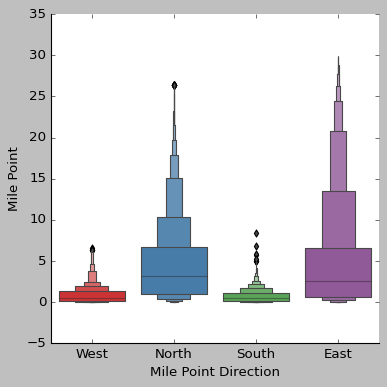

In [144]:
#broken box plot using mile marker and lane direction
ax = sns.catplot(x="Mile Point Direction", y='Mile Point', data=mc_crash2, palette="Set1", kind="boxen")
plt.show()

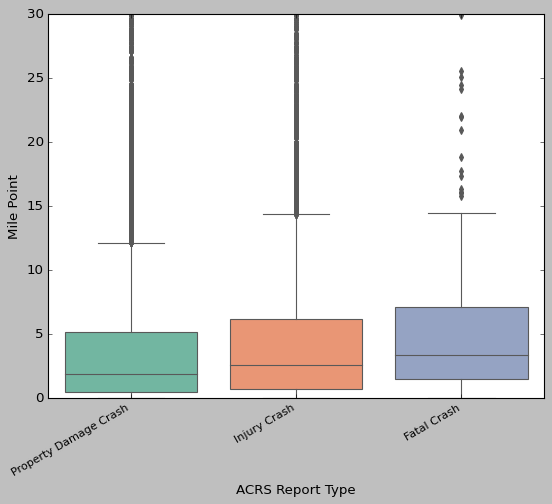

In [145]:
##box plot using mile marker and type of crashes
ax = sns.boxplot(x="ACRS Report Type", y='Mile Point', data=mc_crash2, palette="Set2")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


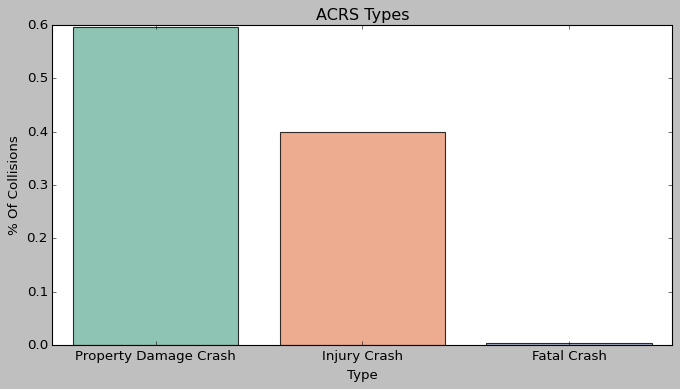

In [146]:
#graphing ACRS report type
acrs_type = mc_crash2["ACRS Report Type"].value_counts(normalize=True)
acrs_type = acrs_type[:5,]
plt.figure(figsize=(10,5))
sns.barplot(acrs_type.index, acrs_type.values, palette="Set2", alpha=0.8)
plt.title('ACRS Types')
plt.ylabel('% Of Collisions', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

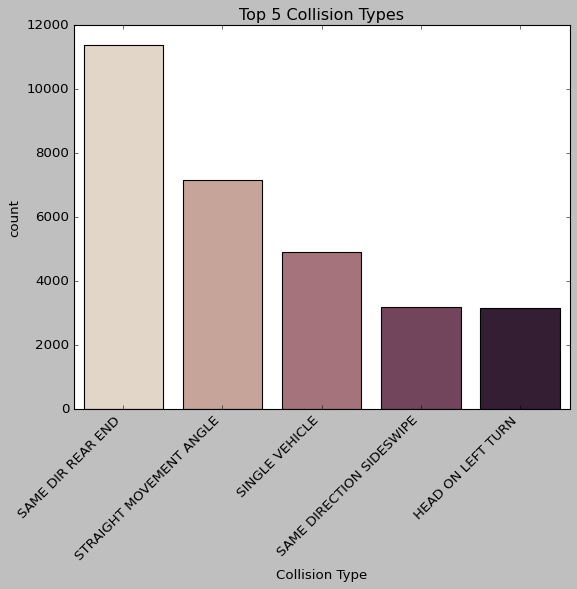

In [147]:
#bar graph using count and type of collision
coll_count = sns.countplot(x='Collision Type',data=mc_crash2, palette="ch:.25",order=pd.value_counts(mc_crash2['Collision Type']).iloc[:5 ].index)
coll_count.set_xticklabels(coll_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 5 Collision Types')
plt.show()

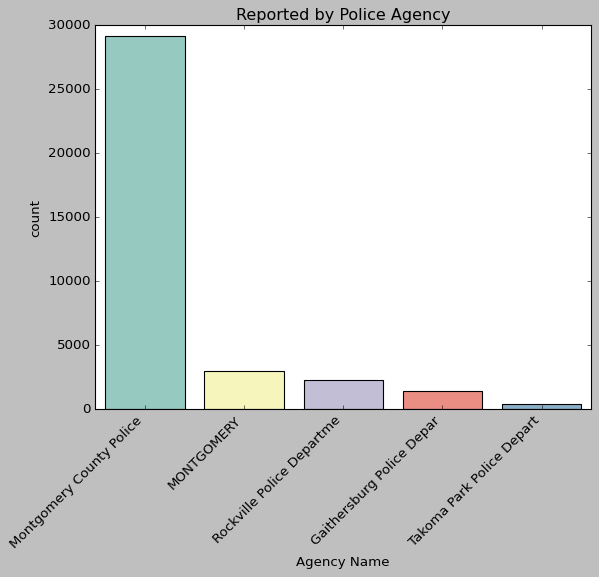

In [148]:
#bar graph: using count which agencies report the most crashes
ag_count = sns.countplot(x='Agency Name',data=mc_crash2, palette="Set3",order=pd.value_counts(mc_crash2['Agency Name']).iloc[:5 ].index)
ag_count.set_xticklabels(ag_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Reported by Police Agency')
plt.show()

In [149]:
#percentage of collisions that are hit & run and not 
mc_crash2['Hit/Run'].value_counts(normalize=True)


No     0.865058
Yes    0.134942
Name: Hit/Run, dtype: float64

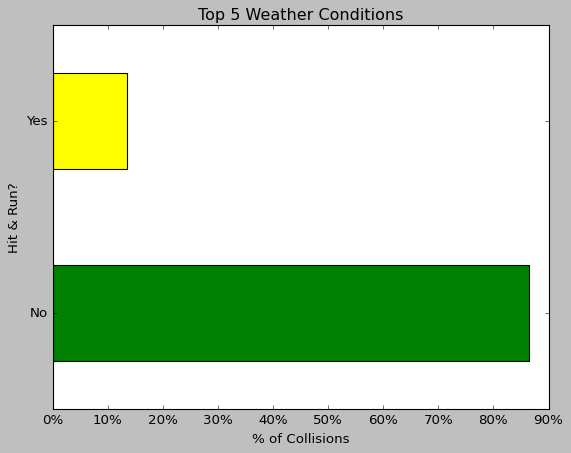

In [150]:
#graphing above percentages
hit_run = mc_crash2['Hit/Run'].value_counts(normalize=True).plot(kind='barh', color=['green','yellow'])
hit_run.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Top 5 Weather Conditions')
plt.ylabel('Hit & Run?', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()

In [151]:
#weather breakdown of crashes
mc_crash2['Weather'].value_counts(normalize=True)

CLEAR                       0.717819
RAINING                     0.137287
CLOUDY                      0.119182
SNOW                        0.010334
FOGGY                       0.004608
UNKNOWN                     0.002918
WINTRY MIX                  0.002863
OTHER                       0.001800
SLEET                       0.001527
SEVERE WINDS                0.000954
BLOWING SNOW                0.000627
BLOWING SAND, SOIL, DIRT    0.000082
Name: Weather, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


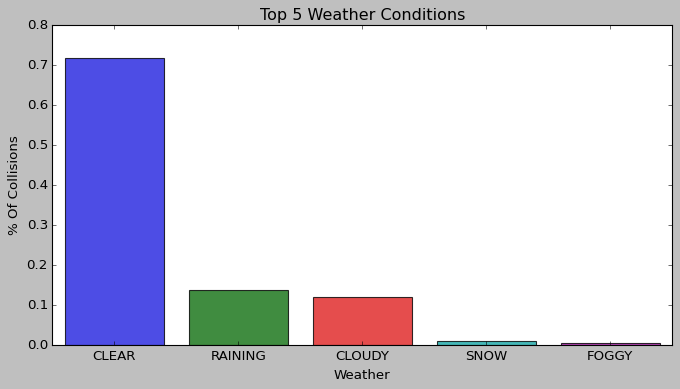

In [152]:
#graphing top 5 weather conditions
weather = mc_crash2['Weather'].value_counts(normalize=True)
weather = weather[:5,]
plt.figure(figsize=(10,5))
sns.barplot(weather.index, weather.values, alpha=0.8)
plt.title('Top 5 Weather Conditions')
plt.ylabel('% Of Collisions', fontsize=12)
plt.xlabel('Weather', fontsize=12)
plt.show()